# <center>CS551G - Data Mining and Visualisation</center>

# <center>Assessment I (Task 1): Unsupervised Learning with K-means and EM for Dog Breed Data Clustering and EDA</center>

---

## <center>Author: Konstantin Georgiev</center>
### <center>Email: k.georgiev.19@abdn.ac.uk</center>

---


### Introduction to K-means clustering

&nbsp;&nbsp;&nbsp;<b>K-means clustering</b> is a unsupervised learning technique, which utilizes the <b>centroid</b> of the respective data distributions to assign new data points to specific clusters \cite{}. The goal of the algorithm is to minimize the <b>sum of distances</b> between the points and their respective centroids. The objective function can be expressed as the following \cite{}:

$$ J = \sum_{i=1}^{m}\sum_{k=1}^{K}||x^i - \mu_k||^2$$

&nbsp;&nbsp;&nbsp;This approach assigns the data points and recalculate the new position of the centroids after this change. In this case, $m$ signifies the total number of examples and $K$ is the number of clusters. For each example, a <b>distance function</b> is computed between the current data point ($x^i$) and the position of the respective centroid ($\mu_k$). The <b>centroids</b> in the data are points that represent the current location of each cluster center, where the number of clusters $K$ is explicitly defined.

&nbsp;&nbsp;&nbsp;During the first step of the <b>K-means algorithm</b>, the <b>centroids</b> are initialized as randomly selected data points. Then, following the <b>objective function</b> for each data point, the <b>Euclidean distance</b> between that point and each cluster center is computed, which is simply the squared difference between the two coordinates. The goal is to minimize this distance as much as possible, in order to make the clusters linearly separable. Thus, in the <b>Assignment step</b>, each data point is assigned to the cluster, that is nearest to the point (minimum distance). Finally, the <b>Update step</b> involves re-estimating the new <b>centroid</b> for the affected cluster $k^i$ by the assignment. This process repeats until convergence, or until all data points have been assigned to a cluster.

&nbsp;&nbsp;&nbsp;<b>Expectation Maximization (EM)</b> is an alternative to <b>K-means clustering</b>, which is derived from probability theory and uses <b>likelihood estimation</b> \cite{}. The goal of the algorithm is to maximize an initially defined <b>lower-bound function</b>, which is used to assign the point to the cluster with the highest likelihood. Unlike <b>K-means</b>, it uses <b>soft (unstructured)</b> clustering, as the similarity measure used probabilities rather than <b>L2 norm</b>. This makes <b>EM</b> more likely to converge to at least a local minima, although it is more computationally intensive than <b>K-means</b>. <b>EM</b> also seems like the more difficult algorithm to optimize, as it can rely on <b>random restarts</b> to get out of its local minima.

<center><img align="center" width="400" height="400" src="https://upload.wikimedia.org/wikipedia/commons/e/ea/K-means_convergence.gif"></center>

<center><b>Fig.1: K-means clusterning convergence example</b></center>

### Project Structure

1.   <b> [Data acquisition.](#section1) </b>
2.   <b> [Exploratory Data Analysis.](#section2) </b>
3.   <b> [Feature correlations.](#section3) </b>
4.   <b> [Developing the K-means clustering model.](#section4) </b>
5.   <b> [Evaluation.](#section5) </b>
6.   <b> [Cluster visualizations.](#section6) </b>
7.   <b> [Conclusion.](#section7) </b>

#### Libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import scipy.stats

from sklearn.mixture import GaussianMixture

from IPython.display import clear_output

sns.set(style='whitegrid', palette="deep", font_scale=1.1, rc={"figure.figsize": [10, 10]})

#### Data acquisition
<a id='section1'></a>

The dog breed dataset was loaded using the <b>pandas</b> library. As seen from the output below, it contains <b>300</b> samples and <b>4</b> features, with no missing values. The features are all numeric and of <b>float</b> datatype. Furthermore, we can observe that the <b>height</b> values are of much larger scale (with mean of ```5.93```) compared to the other features, which means that some scaling might be beneficial. All of the features describe a measurement regarding a dog's characteristics. It is uncertain what type of unit of measurement is taken here, however, judging from the information about the height, I would assume that it is somewhere in the region of <b>decimetres</b> or <b>inches</b>.

In [2]:
breeds_data = pd.read_csv('DMV_CS551G_Assessment1_Task1_dataset.csv')
breeds_data.head()

,height,tail length,leg length,nose circumference
0,5.151,3.535,1.414,0.202
1,4.949,3.030,1.414,0.202
2,4.747,3.232,1.313,0.202
3,4.646,3.131,1.515,0.202
4,5.050,3.636,1.414,0.202


In [3]:
print(breeds_data.dtypes)

height                float64
tail length           float64
leg length            float64
nose circumference    float64
dtype: object


In [4]:
print(breeds_data.shape)

(300, 4)


In [5]:
print(breeds_data.describe())

           height  tail length  leg length  nose circumference
count  300.000000   300.000000   300.00000          300.000000
mean     5.930983     3.103193     3.81437            1.217323
std      0.839601     0.441935     1.78890            0.772409
min      4.343000     2.020000     1.01000            0.101000
25%      5.202000     2.828000     1.61600            0.305250
50%      5.858000     3.060000     4.41500            1.326000
75%      6.528000     3.366000     5.20200            1.836000
max      8.058000     4.488000     7.03800            2.550000


In [6]:
print('Number of NaNs:', len(breeds_data[breeds_data.isnull().any(axis=1)]))

Number of NaNs: 0


<a id='section2'></a>
#### Exploratory Data Analysis

In [7]:
colors = ['darkorange', 'darkgreen', 'darkred', 'darkblue']
cols = ['height', 'tail length', 'leg length', 'nose circumference']

##### Feature distributions

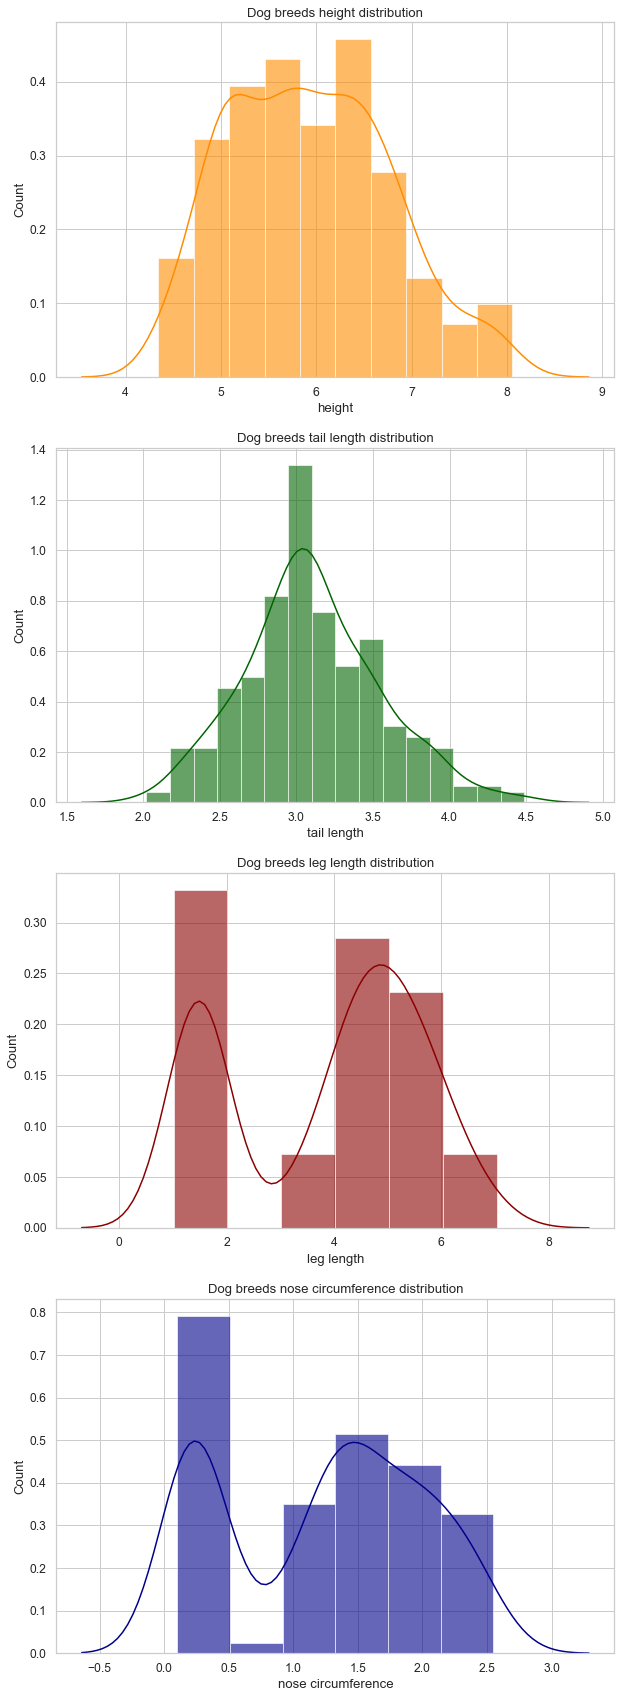

In [8]:
fig, axes = plt.subplots(ncols=1, nrows=4, figsize=(10, 30))
for i, ax in zip(range(len(cols)), axes.flat):
    sns.distplot(
    breeds_data[cols[i]], norm_hist=True, kde=True, hist_kws={"alpha": 0.6}, color=colors[i], ax=ax
            ).set(xlabel=cols[i], ylabel='Count', title=str('Dog breeds ' + cols[i] + ' distribution'));
plt.show()

From these results we can observe that the <b>height</b> and <b>tail length</b> represent fairly normal distributions with the <b>tail length</b> even being shaped like a <b>gaussian bell</b>. On the other hand, the <b>leg length</b> and <b>nose circumference</b> have quite an imbalanced <b>bimodal</b> distribution and might be harder to distinguish. The values between these two features also seem highly correlated, although on a different scale.

<a id='section3'></a>
#### Feature correlations

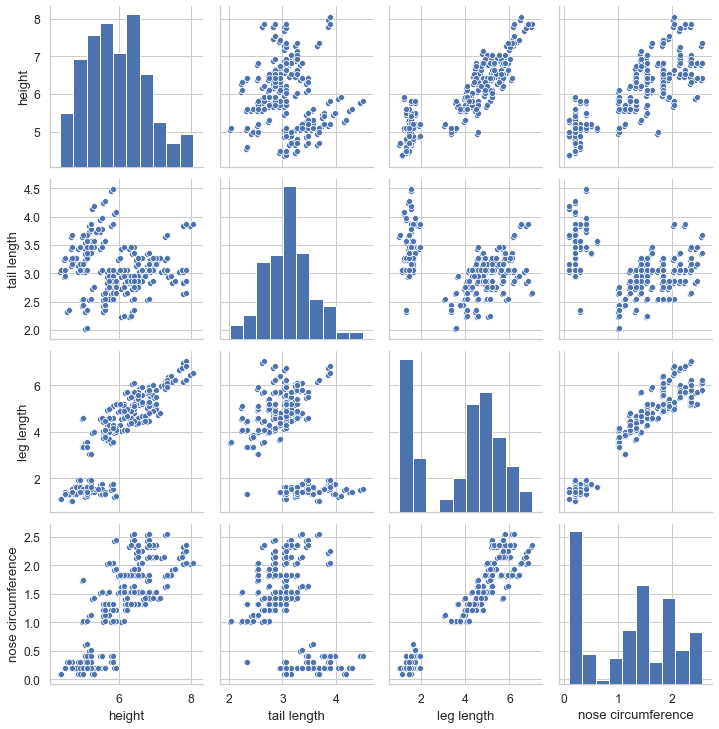

In [9]:
sns.pairplot(breeds_data, height=2.5);

From the <b>pairplot</b> of correlations, we can observe that each feature pair separates the data points in <b>2</b> fairly distinct groups. Perhaps the clearest groups are represented in the <b>leg length</b>-<b>nose circumference</b> relationship, which may indicate that they hold the most relevance, in terms of identifying the clusters.  

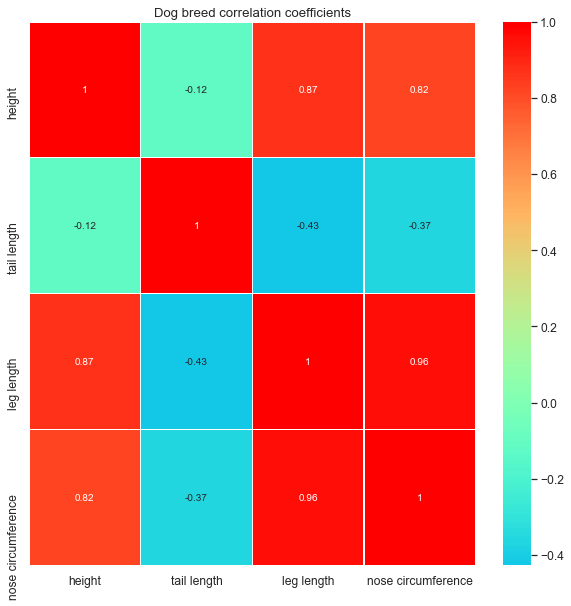

In [10]:
plt.figure(figsize=(10,10))
sns.heatmap(breeds_data.corr(),annot=True,linewidth=0.5,center=0,cmap='rainbow').set(title='Dog breed correlation coefficients')
plt.show()

As expected, the <b>leg length</b> and <b>nose circumference</b> measurements are very highly correlated. In addition to this, the <b>height</b> is also indicative to the growth of the <b>leg length</b> and <b>nose circumference</b>, which also makes sense for larger dogs. 

<a id='section4'></a>
#### Developing the K-means clustering model

The implementation below consists of a <b>K-means clustering</b> model, implemented from scratch, as well as a <b>Gaussian Mixture Model (GMM) from scikit-learn</b>, which uses the <b>EM</b> algorithm for comparison. Nonetheless, most of the functionality revolves around the <b>K-means</b> algorithm:
- ```initialize_centroids(self, data, seed)``` <b>(initialization)</b>: assigns $k$ number of points as the initial centroids at random with a specified seed
- ```get_euc_distances(self, data, centroids)```: calculates the euclidean distance (or <b>L2 norm</b>) between each data point and centroid (<b>numpy</b>'s ```linalg.norm``` is quite useful here, as it can vectorize the operation)
- ```assign_clusters(self, data, centroids)``` <b>(assignment step)</b>: gets the vector of distances and assigns a label to each data point, relative to the centroid with the minimum distance (that is the closest for each sample)
- ```update_centroids(self, data, labels):``` <b>(update step)</b>: updates the position of each centroids based on the mean of the newly assigned points
- ```kmeans_fit(self, data, plot=False, feat_idx=[2, 3], seed=41):```: main <b>K-means</b> method; initializes the centroids and performs ```n_iter``` optimization iterations with <b>early stopping</b> if none of the data points are assigned differently from the previous iteration; each iteration consists of an <b>assignment step</b>, <b>update step</b> and <b>plotting of the data points in their current clusters</b>, if needed; after the optimization is complete, the <b>inertia score</b> is calculated using the <b>Sum of Squared Differences</b> between each data point and the centroid, which it belongs to ($c^{i=l}$), or:

$$I = \sum_{i=1}^{n}(c^{i=l} - x^i)^2$$

&nbsp;&nbsp;&nbsp;The input parameters of the <b>K-means model</b> simply contain the <b>number of optimization iterations</b>, the <b>k</b> parameters, which sets the number of clusters and a color dictionary with up to 10 classes, for plotting. For simplicity, the <b>Gaussian Mixture Model</b> uses the same input parameters and the <b>covariance type</b> has not been tuned, which modifies the shape of the clusters. Overall, the <b>```gmm_fit```</b> function simply calls the <b>scikit-learn</b> API to fit and predict the clusters with the specified parameters, after which it plots the results similiarly to the <b>K-means</b> method, with the exception that the cluster center coordinates are not given and need to be estimated using the <b>covariance</b> and <b>mean</b> vectors (i.e using <b>scipy</b> to estimate the point with the highest <b>density</b> for each region with the <b>log</b> of the probability density function). Finally, the <b>Akaike and Bayesian Information Criterion (AIC and BIC)</b> are used for validation, instead of <b>inertia</b>, which is unsuitable for <b>Probabilistic Model Selection</b>.



In [11]:
class KMeans:
    
    def __init__(self, num_iter, k):
        self.num_iter = num_iter
        self.k = k
        self.color_dict = dict({1:'green',
                  2:'orange',
                  3: 'darkblue',
                  4: 'red',
                  5: 'darkred',
                  6: 'purple',
                  7: 'yellow',
                  8: 'black', 
                  9: 'cyan',
                  10: 'pink'})
        
    def initialize_centroids(self, data, seed):
        np.random.seed(seed)
        centroid_indices = np.random.randint(0, data.shape[0], self.k)
        centroids = data.iloc[centroid_indices].values
        return centroids
    
    def get_euc_distances(self, data, centroids):
        distances = np.zeros((data.shape[0],self.k))      
        for i in range(self.k):
            distances[:,i] = np.linalg.norm(data.values - centroids[i], axis=1)
            
        return distances
    
    def assign_clusters(self, data, centroids):
        distances = self.get_euc_distances(data, centroids)
        labels = np.argmin(distances, axis=1)
        return distances, labels
    
    def update_centroids(self, data, labels):
        new_centroids = []
        for i in range(self.k):
            new_centroids.append(data[labels == i].mean(axis=0))
        return np.array(new_centroids)
    
    def kmeans_fit(self, data, plot=False, feat_idx=[2, 3], seed=41):
        print('Fitting K-means model')
        sns.set(style='whitegrid', palette="deep", font_scale=1.1, rc={"figure.figsize": [8, 8]})
        centroids = self.initialize_centroids(data, seed=seed)
        prev_centroids = []
        for i in range(self.num_iter):
            print('Iteration: ', i + 1)
            
            distances, labels = self.assign_clusters(data, centroids)
            centroids = self.update_centroids(data, labels)
            #print(centroids)
            labels_plt = labels + 1
            
            if len(prev_centroids) > 0 and (centroids == prev_centroids).all():
                print('No updates found for the data points.. algorithm converged at {} iterations.'.format(i+1))
                if plot:
                    ax = sns.scatterplot(x=data.iloc[:, feat_idx[0]], y=data.iloc[:, feat_idx[1]], hue=np.array(labels_plt), 
                                    palette=self.color_dict)
                    ax = sns.scatterplot(x=centroids[:, feat_idx[0]], y=centroids[:, feat_idx[1]], c=['darkgray'], 
                                     s=200, legend=None)
                    plt.show()
                clear_output(wait=True)
                break
            
            if plot:
                ax = sns.scatterplot(x=data.iloc[:, feat_idx[0]], y=data.iloc[:, feat_idx[1]], hue=np.array(labels_plt), 
                                    palette=self.color_dict)
                ax = sns.scatterplot(x=centroids[:, feat_idx[0]], y=centroids[:, feat_idx[1]], c=['darkgray'], 
                                     s=200, legend=None)
                plt.show()
                
            prev_centroids = centroids
            clear_output(wait=True)
            
        inertia = sum(((centroids[l] - x)**2).sum()
                            for x, l in zip(data.values, labels))
            
        return centroids, labels, inertia
        
    def gmm_fit(self, data, plot=False, feat_idx=[2, 3], seed=42):
        
        print('Fitting EM model based on Gaussian mixtures')
        sns.set(style='whitegrid', palette="deep", font_scale=1.1, rc={"figure.figsize": [8, 8]})
        gmm = GaussianMixture(n_components=self.k, max_iter=self.num_iter, random_state=seed)
        labels = gmm.fit(data).predict(data)
        labels_plt = labels + 1

        print('Total iterations:', gmm.n_iter_)
        if plot:
            clear_output(wait=True)
            ax = sns.scatterplot(x=data.iloc[:, feat_idx[0]], y=data.iloc[:, feat_idx[1]], hue=np.array(labels_plt),
                                palette=self.color_dict)
            centers = np.empty(shape=(gmm.n_components, data.shape[1]))
            for i in range(gmm.n_components):
                density = scipy.stats.multivariate_normal(cov=gmm.covariances_[i], mean=gmm.means_[i]).logpdf(data)
                centers[i, :] = data.iloc[np.argmax(density)]
            ax = sns.scatterplot(x=centers[:, feat_idx[0]], y=centers[:, feat_idx[1]], s=200, legend=None, 
                                 c=['darkgray'])
            plt.show()
        return gmm.aic(data), gmm.bic(data)

<a id='section5'></a>
#### Evaluation (elbow method - inertia for K-means; BIC and AIC for GMM)

The goal of the evaluation method is to select the most suitable $k$ value based on the scoring methods for the two models. The simulation is run for the range $[1,10]$ with specific seeds for both methods to ensure reproducibility. The scoring criterias for each model (<b>Inertia, AIC and BIC</b>) are estimated and saved into lists for each model. Finally, the scores are plotted using <b>seaborn</b>, in order to track the scores over the $k$ values. In this case, <b>the elbow method</b> is used to choose the best $k$ value, that is when the score curve starts to get a lot more steeper (thus adding another cluster does not signify a great benefit to the model). In the case of <b>BIC</b>, the score usually starts <b>increasing</b> slightly after the optimal point is reached.

Fitting K-means with K = 10
Fitting GMM with K = 10
Fitting EM model based on Gaussian mixtures
Total iterations: 19


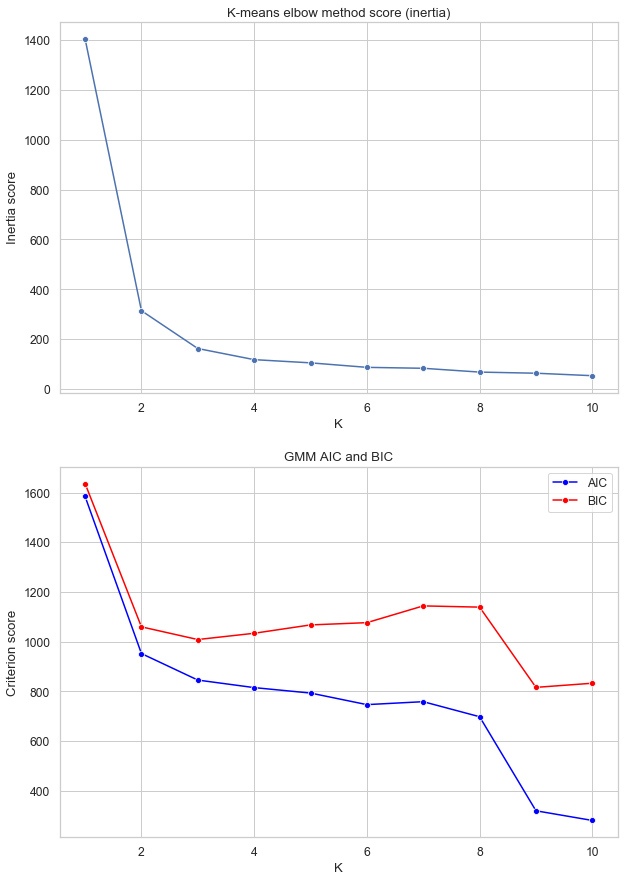

In [12]:
def run_evaluation(gmm_seed=42, km_seed=41):
    inertias = []
    aics = []
    bics = []

    for k in range(1, 11):

        kmeans = KMeans(num_iter = 50, k = k)
        centroids, labels, inertia = kmeans.kmeans_fit(breeds_data, plot=False, seed=km_seed)
        print('Fitting K-means with K =', k)
        inertias.append(inertia)

        print('Fitting GMM with K =', k)
        aic, bic = kmeans.gmm_fit(breeds_data, plot=False, seed=gmm_seed)
        aics.append(aic)
        bics.append(bic)

    fig, axes = plt.subplots(ncols=1, nrows=2, figsize=(10, 15))
    sns.lineplot(x=range(1,11), y=inertias, marker="o", ax=axes[0]).set(title='K-means elbow method score (inertia)',
                                                                       xlabel='K', ylabel='Inertia score')
    sns.lineplot(x=range(1,11), y=aics, marker="o", ax=axes[1], color='blue', label='AIC')
    sns.lineplot(x=range(1,11), y=bics, marker="o", ax=axes[1], color='red', label='BIC').set(title='GMM AIC and BIC', xlabel='K', 
                                                                                 ylabel='Criterion score')
    plt.show()
    
run_evaluation()

After running the evaluation for up to <b>10</b> clusters, we can observe that both models identify $k=3$ as the optimal value. The <b>inertia</b> line clearly starts to get much steeper after that value, though the <b>AIC</b> and <b>BIC</b> scores signify a second rapid decrease before $k=9$. Thus, $k=9$ could also be a beneficial model, however it is more likely to overfit the data.

Fitting K-means with K = 10
Fitting GMM with K = 10
Fitting EM model based on Gaussian mixtures
Total iterations: 12


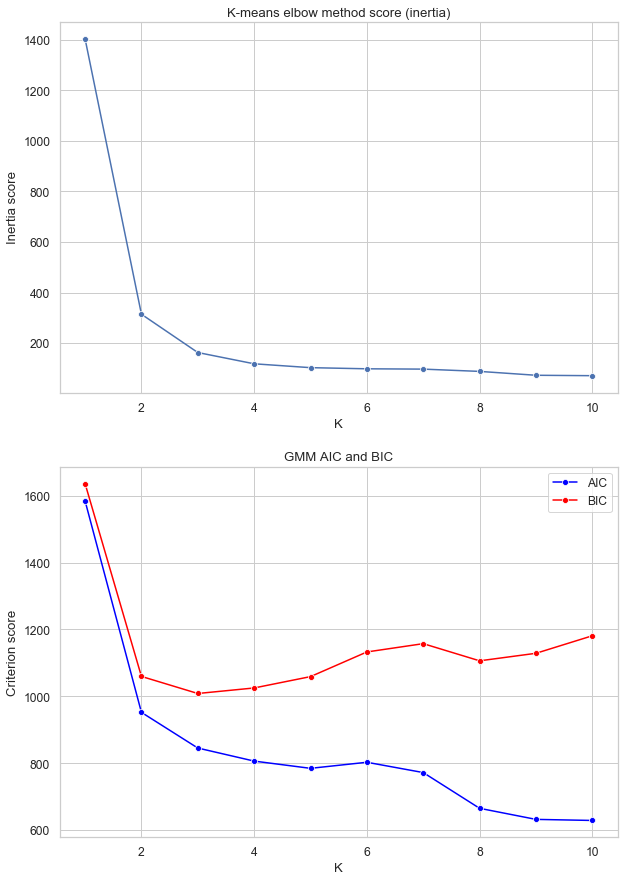

In [13]:
run_evaluation(gmm_seed=6, km_seed=19)

Now, after running the evaluation with different seeds, we can see the same results for the <b>inertia</b> score, but much <b>steeper</b> lines for the <b>GMM</b> model. In this case, judging from <b>AIC</b>'s shape, $k=9$ could again be seen as a potential candidate, however, the lowest point in <b>BIC</b> this time is $k=3$, which supports my first assumption. From this information, we can assume that the optimal value is $k=3$, as it seems like the more realistic option. 

As we can see, <b>random restarts</b> can affect the model performance here to some extent, mostly due to the random initializations of the <b>centroids</b>. For example, when a centroid can not be centered correctly due to its initial position, then this will cause a very high increase in the model score, which could cause invalid assumptions if we apply the <b>elbow method</b>. For this reason, we should test our models on different seeds to make sure our models produce consistent results (or use a more intelligent method of initialization).

<a id='section6'></a>
#### K-means vs EM - 10it, k=4

Now we can compare the performance of the two models, visually by displaying the clusters. The features chosen for visualization by default were the ones with the highest correlation: <b>nose circumference</b> and <b>leg length</b>.

Iteration:  10


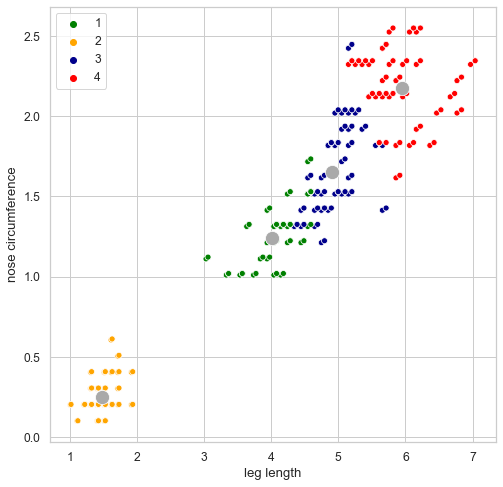

In [14]:
kmeans = KMeans(num_iter = 10, k = 4)
centroids, labels, _ = kmeans.kmeans_fit(breeds_data, plot=True, seed=41)

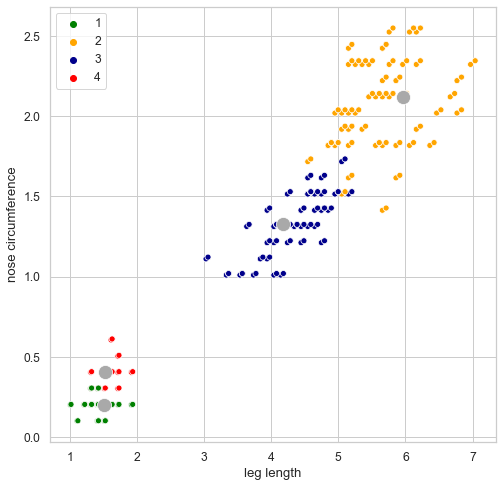

In [15]:
_, _ = kmeans.gmm_fit(breeds_data, plot=True, seed=42)

For a lower number of iterations and <b>4</b> clusters, the <b>K-means</b> method seems to perform better, as the <b>GMM</b> starts to overfit on the clearly separable class on the bottom left, although this could be due to the initialization.

#### K-means vs EM - 10it, k=3

Iteration:  10


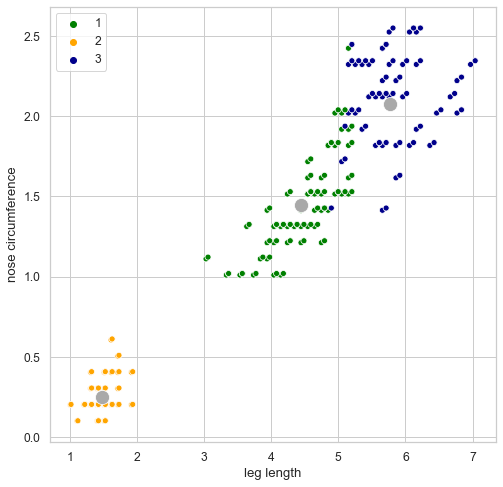

In [16]:
kmeans = KMeans(num_iter = 10, k = 3)
centroids, labels, _ = kmeans.kmeans_fit(breeds_data, plot=True, seed=41)

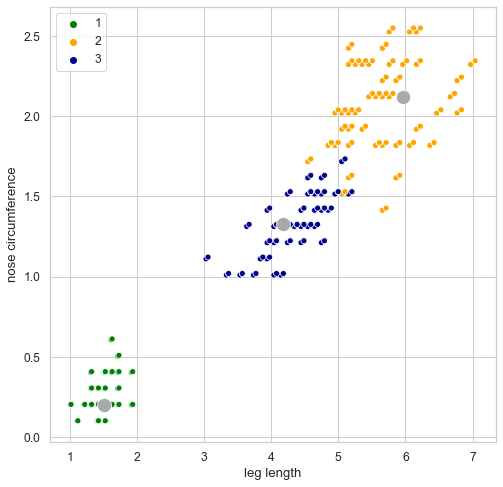

In [17]:
_, _ = kmeans.gmm_fit(breeds_data, plot=True, seed=42)

For <b>3</b> clusters both results seem quite accurate. The <b>GMM model</b> seems like it draws a slightly more precise linear decision boundary that represents less errors, between classes <b>2</b> and <b>3</b>.

#### K-means vs EM - 300it, k=4

Iteration:  11
No updates found for the data points.. algorithm converged at 11 iterations.


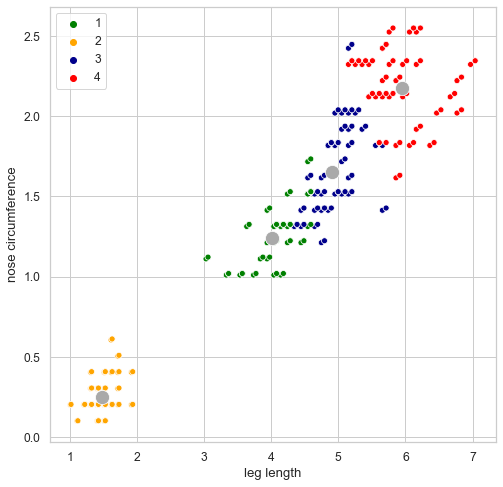

In [18]:
kmeans = KMeans(num_iter = 300, k = 4)
centroids, labels, _ = kmeans.kmeans_fit(breeds_data, plot=True, seed=41)

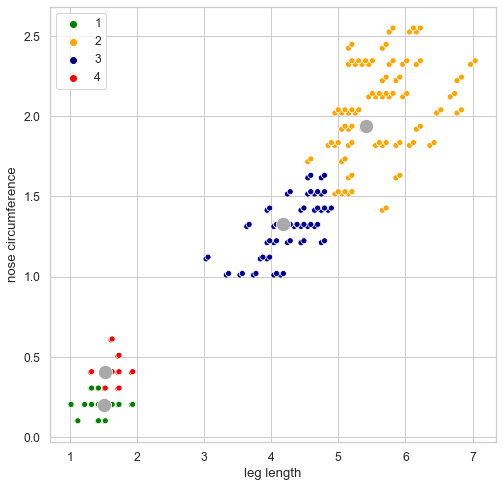

In [19]:
_, _ = kmeans.gmm_fit(breeds_data, plot=True, seed=42)

When we increase the <b>maximum number of iterations</b>, for <b>4</b> clusters the results are more or less the same, with the <b>GMM</b> model still overfitting on the same cluster, which is most likely due to the initialization.

#### K-means vs EM - 300it, k=3

Iteration:  13
No updates found for the data points.. algorithm converged at 13 iterations.


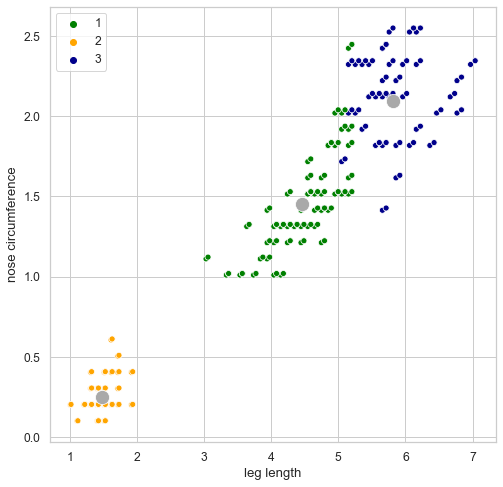

In [20]:
kmeans = KMeans(num_iter = 300, k = 3)
centroids, labels, _ = kmeans.kmeans_fit(breeds_data, plot=True, seed=41)

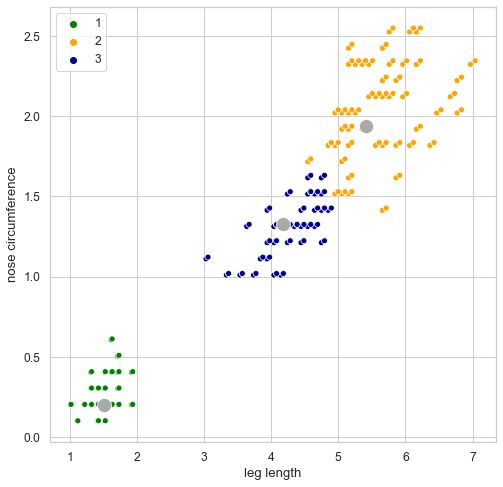

In [21]:
_, _ = kmeans.gmm_fit(breeds_data, plot=True, seed=42)

This seems to be the best case scenario, compared to the other models. With $k=3$ and high enough iteration count for the algorithms to converge, the errors in both models seem to be <b>minimized</b>, with the <b>GMM</b> model producing a slightly better decision boundary.

Iteration:  13
No updates found for the data points.. algorithm converged at 13 iterations.


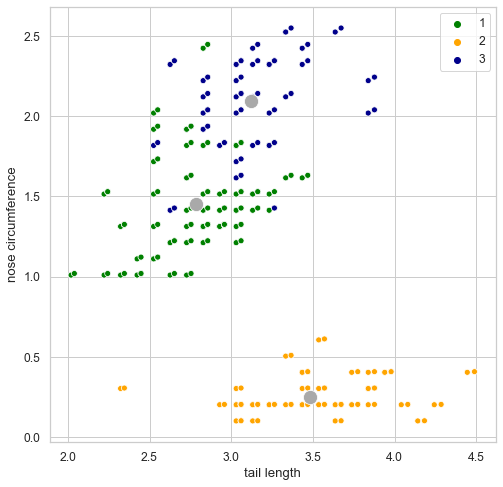

In [22]:
kmeans = KMeans(num_iter = 300, k = 3)
centroids, labels, _ = kmeans.kmeans_fit(breeds_data, plot=True, seed=41, feat_idx=[1, 3])

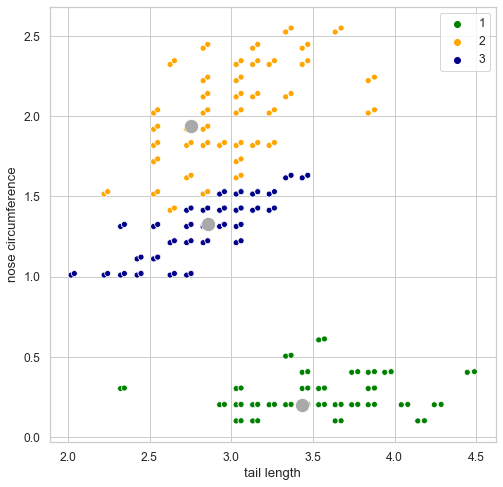

In [23]:
_, _ = kmeans.gmm_fit(breeds_data, plot=True, seed=42, feat_idx=[1, 3])

In addition, we can also visualize the results for the other features, for example, <b>tail length</b> vs <b>nose circumference</b>. This is a much harder relationship to model and we can see that the <b>GMM</b> builds a better decision boundary for this case, as well.

<a id='section7'></a>
### Conclusion

To summarize, <b>two unsupervised clustering algorithms</b> were implemented and compared using cluster visualizations (<b>K-means</b> from scratch and <b>GMM</b> using scikit-learn). Both models were validated using the <b>elbow method</b> on different criteria (<b>inertia, AIC and BIC</b>). In both cases, the results indicated that $k=3$ was the most optimal value for the number of clusters from the range $[1,10]$. For the chosen initialization seeds, it seems that <b>GMM</b> outperforms <b>K-means</b> slightly, as it generates better decision boundaries. 

&nbsp;&nbsp;&nbsp;Of course, there is no guarantee that this result will be consistent, as both models can have varying performance, relative to the initial position of the centroids. For the <b>K-means</b> method, the fully random initialization might also be a drawback, as it could fail to converge in some case scenarios, causing performance loss and invalid validation scores and the <b>scikit-learn</b> seems to have a more intelligent method for initialization (based on <b>K-means</b> as well). But nonetheless, judging from the <b>feature correlations</b> in the EDA section, there seems to be a clear pattern of at least <b>two</b> separable groups. The clustering methods identify a third one, as well, which does not seem to be linearly separable without getting at least a few errors.